# 경기선행지수 : CLI
* OECD 경기선행지수 (KOR)

<pre>
업황 
코스피 지수 
재고순환지표 
재고량 
장단기 금리차(3년물-1일물 금리) 
순교역조건(수출단가/수입단가)*100


In [1]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 6.4 MB 9.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
from datetime import datetime
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


plt.rcParams["figure.figsize"] = (14, 5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'b'

In [4]:
# Composite Leading Indicator

# https://data.oecd.org/leadind/composite-leading-indicator-cli.htm

def getCLI(country):
    uri = 'https://stats.oecd.org/sdmx-json/data/DP_LIVE/' + country + '.CLI.AMPLITUD.LTRENDIDX.M/OECD?json-lang=en&dimensionAtObservation=allDimensions&startPeriod=2000-01&endPeriod=2022-10'
    resp = requests.get(uri)
    result = json.loads(resp.text)
    dates = []
    cli = []
    cli_code = 'CLI.' + country
    observations = result['dataSets'][0]['observations']
    for key in observations:
        obs = observations[key][0]
        cli.append(obs)
    time_period = result['structure']['dimensions']['observation'][5]['values']

    for date in time_period:
        date = date['id']
        year = int(date[:4])
        month = int(date[5:7])
        dates.append(datetime(year=year, month=month, day=1))
    df = pd.DataFrame(data=cli, index=dates, columns=[cli_code])

    return df

# CLIKOR

In [5]:
clikor = getCLI('KOR')

In [6]:
clikor = clikor.reset_index()

In [7]:
clikor.columns = ['Date','CLI']

In [8]:
clikor = clikor.set_index('Date')

In [9]:
clikor

,CLI
Date,
2000-01-01,104.56020
2000-02-01,104.07440
2000-03-01,103.61260
2000-04-01,103.20330
2000-05-01,102.81550
...,...
2021-12-01,99.99874
2022-01-01,99.75789
2022-02-01,99.54153


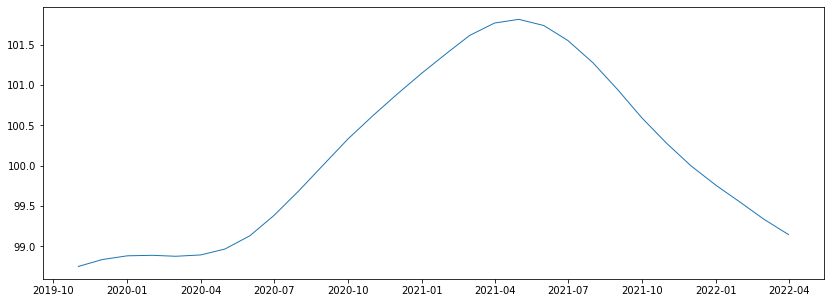

In [14]:
fig, axes = plt.subplots(figsize=(14,5))
plt.plot(clikor['CLI'].loc['2019-11-01':].index, clikor['CLI'].loc['2019-11-01':], label=clikor['CLI'].loc['2019-11-01':])

In [ ]:
clikor = clikor.reset_index()

In [ ]:
clikor.Date=clikor.Date.astype('str')

In [ ]:
clikor=clikor.append({'Date':'2022-05-01','CLI':0},ignore_index=True)
clikor=clikor.append({'Date':'2022-06-01','CLI':0},ignore_index=True)
clikor

,Date,CLI
0,2000-01-01,104.56020
1,2000-02-01,104.07440
2,2000-03-01,103.61260
3,2000-04-01,103.20330
4,2000-05-01,102.81550
...,...,...
265,2022-02-01,99.54153
266,2022-03-01,99.34025
267,2022-04-01,99.14754
268,2022-05-01,0.00000


In [ ]:
clikor['CLI']=clikor['CLI'].shift(2)
#clikor['CLI']=clikor['CLI'].shift(1) # --> 1개월 선행보다 2개월 선행의 cli 값이 더 기간 파악이 용이함.
clikor

,Date,CLI
0,2000-01-01,NaN
1,2000-02-01,NaN
2,2000-03-01,104.56020
3,2000-04-01,104.07440
4,2000-05-01,103.61260
...,...,...
265,2022-02-01,99.99874
266,2022-03-01,99.75789
267,2022-04-01,99.54153
268,2022-05-01,99.34025


In [ ]:
clikor.Date = pd.to_datetime(clikor.Date)

In [ ]:
clikor = clikor.set_index('Date')

In [ ]:
clikor['한국cli증가율'] = clikor['CLI'].pct_change(1)
clikor

,CLI,한국cli증가율
Date,,
2000-01-01,NaN,NaN
2000-02-01,NaN,NaN
2000-03-01,104.56020,NaN
2000-04-01,104.07440,-0.004646
2000-05-01,103.61260,-0.004437
...,...,...
2022-02-01,99.99874,-0.002762
2022-03-01,99.75789,-0.002409
2022-04-01,99.54153,-0.002169


In [ ]:
clikor = clikor.dropna()
clikor

,CLI,한국cli증가율
Date,,
2000-04-01,104.07440,-0.004646
2000-05-01,103.61260,-0.004437
2000-06-01,103.20330,-0.003950
2000-07-01,102.81550,-0.003758
2000-08-01,102.41150,-0.003929
...,...,...
2022-02-01,99.99874,-0.002762
2022-03-01,99.75789,-0.002409
2022-04-01,99.54153,-0.002169


In [ ]:
def momentum_score(x):
    if x>0:
        return 1
    elif x<0:
        return 0

In [ ]:
clikor['한국cli모멘텀']=clikor.한국cli증가율.apply(momentum_score)
clikor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CLI,한국cli증가율,한국cli모멘텀
Date,,,
2000-04-01,104.07440,-0.004646,0
2000-05-01,103.61260,-0.004437,0
2000-06-01,103.20330,-0.003950,0
2000-07-01,102.81550,-0.003758,0
2000-08-01,102.41150,-0.003929,0
...,...,...,...
2022-02-01,99.99874,-0.002762,0
2022-03-01,99.75789,-0.002409,0
2022-04-01,99.54153,-0.002169,0


In [ ]:
clikor.columns = ['CLI', '한국cli증가율', '한국cli모멘텀']

In [ ]:
둔감 = (clikor['CLI']>100)&(clikor['한국cli모멘텀']==0)
확장 = (clikor['CLI']>100)&(clikor['한국cli모멘텀']==1)
위축 = (clikor['CLI']<100)&(clikor['한국cli모멘텀']==0)
회복 = (clikor['CLI']<100)&(clikor['한국cli모멘텀']==1)

In [ ]:
clikor[위축].index

DatetimeIndex(['2000-12-01', '2001-01-01', '2001-02-01', '2001-03-01',
               '2001-04-01', '2001-05-01', '2001-06-01', '2003-03-01',
               '2003-04-01', '2003-05-01', '2003-06-01', '2003-07-01',
               '2005-01-01', '2005-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01',
               '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
               '2011-12-01', '2012-01-01', '2012-02-01', '2013-10-01',
               '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01',
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [ ]:
clikor[둔감].index

DatetimeIndex(['2000-04-01', '2000-05-01', '2000-06-01', '2000-07-01',
               '2000-08-01', '2000-09-01', '2000-10-01', '2000-11-01',
               '2002-08-01', '2002-09-01', '2002-10-01', '2002-11-01',
               '2002-12-01', '2003-01-01', '2003-02-01', '2004-06-01',
               '2004-07-01', '2004-08-01', '2004-09-01', '2004-10-01',
               '2004-11-01', '2004-12-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2007-11-01', '2007-12-01', '2008-01-01',
               '2008-02-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-04-01', '2011-05-01',
               '2011-06-01', '2011-07-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2016-02-01', '2016-03-01',
      

In [ ]:
clikor[회복].index

DatetimeIndex(['2001-07-01', '2001-08-01', '2001-09-01', '2001-10-01',
               '2001-11-01', '2001-12-01', '2002-01-01', '2003-08-01',
               '2003-09-01', '2003-10-01', '2003-11-01', '2003-12-01',
               '2004-01-01', '2005-03-01', '2005-04-01', '2009-01-01',
               '2009-02-01', '2009-03-01', '2009-04-01', '2009-05-01',
               '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01',
               '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01',
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01', '2013-09-01', '2014-09-01',
               '2014-10-01', '2014-11-01', '2014-12-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01'],
              dtype='datetime64[n

In [ ]:
clikor[확장].index

DatetimeIndex(['2002-02-01', '2002-03-01', '2002-04-01', '2002-05-01',
               '2002-06-01', '2002-07-01', '2004-02-01', '2004-03-01',
               '2004-04-01', '2004-05-01', '2005-05-01', '2005-06-01',
               '2005-07-01', '2005-08-01', '2005-09-01', '2005-10-01',
               '2005-11-01', '2005-12-01', '2006-01-01', '2006-02-01',
               '2006-10-01', '2006-11-01', '2006-12-01', '2007-01-01',
               '2007-02-01', '2007-03-01', '2007-04-01', '2007-05-01',
               '2007-06-01', '2007-07-01', '2007-08-01', '2007-09-01',
               '2007-10-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01',
               '2010-01-01', '2011-03-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-10-01',
               '2015-11-01', '2015-12-01', '2016-01-01', '2016-05-01',
               '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
      

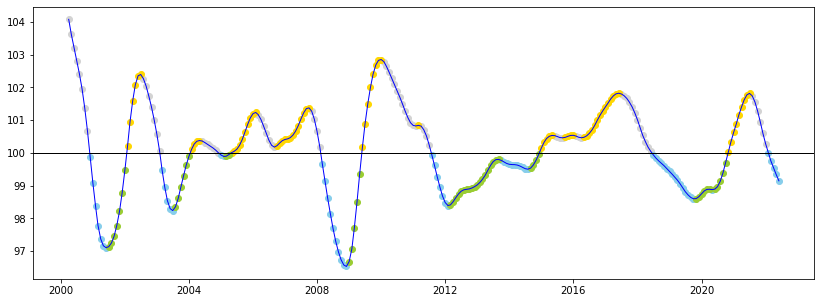

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot
# line plot
ax1.plot( clikor['CLI'], color='blue')

ax1.scatter(clikor[둔감]['CLI'].index, clikor[둔감]['CLI'], color='lightgrey')
ax1.scatter(clikor[확장]['CLI'].index, clikor[확장]['CLI'], color='gold')
ax1.scatter(clikor[위축]['CLI'].index, clikor[위축]['CLI'], color='skyblue')
ax1.scatter(clikor[회복]['CLI'].index, clikor[회복]['CLI'], color='yellowgreen')
ax1.axhline(y=100, color='black')
plt.show()

In [ ]:
clikor['둔감']=0
clikor['위축']=0
clikor['확장']=0
clikor['회복']=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
clikor.loc[clikor[위축].index,'위축']=1
clikor.loc[clikor[둔감].index,'둔감']=1
clikor.loc[clikor[확장].index,'확장']=1
clikor.loc[clikor[회복].index,'회복']=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
clikor[clikor['회복']==1].index

DatetimeIndex(['2001-07-01', '2001-08-01', '2001-09-01', '2001-10-01',
               '2001-11-01', '2001-12-01', '2002-01-01', '2003-08-01',
               '2003-09-01', '2003-10-01', '2003-11-01', '2003-12-01',
               '2004-01-01', '2005-03-01', '2005-04-01', '2009-01-01',
               '2009-02-01', '2009-03-01', '2009-04-01', '2009-05-01',
               '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01',
               '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01',
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01', '2013-09-01', '2014-09-01',
               '2014-10-01', '2014-11-01', '2014-12-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01'],
              dtype='datetime64[n

# CLIUSA

In [ ]:
cliusa = getCLI('USA')

In [ ]:
cliusa = cliusa.reset_index()

In [ ]:
cliusa.columns = ['Date','CLI.USA']

In [ ]:
cliusa = cliusa.set_index('Date')

In [ ]:
cliusa

,CLI.USA
Date,
2000-01-01,101.3953
2000-02-01,101.3298
2000-03-01,101.2315
2000-04-01,101.1100
2000-05-01,100.9600
...,...
2021-12-01,100.0382
2022-01-01,100.0239
2022-02-01,100.0371


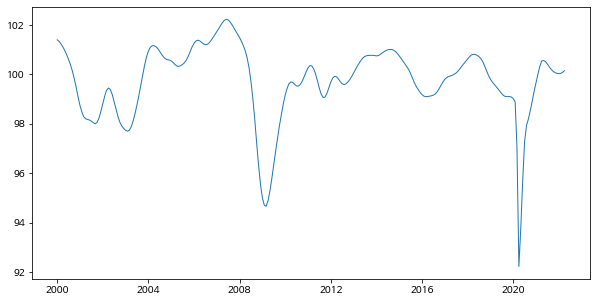

In [ ]:
fig, axes = plt.subplots()
plt.plot(cliusa.index, cliusa['CLI.USA'], label=cliusa['CLI.USA'])

In [ ]:
cliusa = cliusa.reset_index()

In [ ]:
cliusa.Date=cliusa.Date.astype('str')

In [ ]:
cliusa=cliusa.append({'Date':'2022-05-01','CLI.USA':0},ignore_index=True)
#cliusa=cliusa.append({'Date':'2022-06-01','CLI.USA':0},ignore_index=True)
cliusa

,Date,CLI.USA
0,2000-01-01,101.3953
1,2000-02-01,101.3298
2,2000-03-01,101.2315
3,2000-04-01,101.1100
4,2000-05-01,100.9600
...,...,...
264,2022-01-01,100.0239
265,2022-02-01,100.0371
266,2022-03-01,100.0779
267,2022-04-01,100.1464


In [ ]:
#cliusa['CLI.USA']=cliusa['CLI.USA'].shift(2)
cliusa['CLI.USA']=cliusa['CLI.USA'].shift(1)
cliusa

,Date,CLI.USA
0,2000-01-01,NaN
1,2000-02-01,101.3953
2,2000-03-01,101.3298
3,2000-04-01,101.2315
4,2000-05-01,101.1100
...,...,...
264,2022-01-01,100.0382
265,2022-02-01,100.0239
266,2022-03-01,100.0371
267,2022-04-01,100.0779


In [ ]:
cliusa.Date = pd.to_datetime(cliusa.Date)

In [ ]:
cliusa = cliusa.set_index('Date')

In [ ]:
cliusa['미국cli증가율'] = cliusa['CLI.USA'].pct_change(1)
cliusa

,CLI.USA,미국cli증가율
Date,,
2000-01-01,NaN,NaN
2000-02-01,101.3953,NaN
2000-03-01,101.3298,-0.000646
2000-04-01,101.2315,-0.000970
2000-05-01,101.1100,-0.001200
...,...,...
2022-01-01,100.0382,-0.000318
2022-02-01,100.0239,-0.000143
2022-03-01,100.0371,0.000132


In [ ]:
cliusa = cliusa.dropna()
cliusa

,CLI.USA,미국cli증가율
Date,,
2000-03-01,101.3298,-0.000646
2000-04-01,101.2315,-0.000970
2000-05-01,101.1100,-0.001200
2000-06-01,100.9600,-0.001484
2000-07-01,100.7906,-0.001678
...,...,...
2022-01-01,100.0382,-0.000318
2022-02-01,100.0239,-0.000143
2022-03-01,100.0371,0.000132


In [ ]:
def momentum_score(x):
    if x>0:
        return 1
    elif x<0:
        return 0

In [ ]:
cliusa['미국cli모멘텀']=cliusa.미국cli증가율.apply(momentum_score)
cliusa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CLI.USA,미국cli증가율,미국cli모멘텀
Date,,,
2000-03-01,101.3298,-0.000646,0
2000-04-01,101.2315,-0.000970,0
2000-05-01,101.1100,-0.001200,0
2000-06-01,100.9600,-0.001484,0
2000-07-01,100.7906,-0.001678,0
...,...,...,...
2022-01-01,100.0382,-0.000318,0
2022-02-01,100.0239,-0.000143,0
2022-03-01,100.0371,0.000132,1


In [ ]:
cliusa.columns = ['CLI', '미국cli증가율', '미국cli모멘텀']

In [ ]:
둔감 = (cliusa['CLI']>100)&(cliusa['미국cli모멘텀']==0)
확장 = (cliusa['CLI']>100)&(cliusa['미국cli모멘텀']==1)
위축 = (cliusa['CLI']<100)&(cliusa['미국cli모멘텀']==0)
회복 = (cliusa['CLI']<100)&(cliusa['미국cli모멘텀']==1)

In [ ]:
cliusa

,CLI,미국cli증가율,미국cli모멘텀
Date,,,
2000-03-01,101.3298,-0.000646,0
2000-04-01,101.2315,-0.000970,0
2000-05-01,101.1100,-0.001200,0
2000-06-01,100.9600,-0.001484,0
2000-07-01,100.7906,-0.001678,0
...,...,...,...
2022-01-01,100.0382,-0.000318,0
2022-02-01,100.0239,-0.000143,0
2022-03-01,100.0371,0.000132,1


NameError: ignored

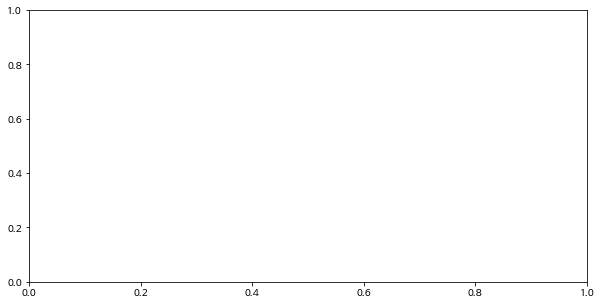

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot
# line plot
ax1.plot(cliusa.index, cliusa['CLI'], color='blue')

ax1.scatter(cliusa[둔감].index, cliusa[둔감]['CLI'], color='green')
ax1.scatter(cliusa[확장].index, cliusa[확장]['CLI'], color='red')
ax1.scatter(cliusa[위축].index, cliusa[위축]['CLI'], color='gray')
ax1.scatter(cliusa[회복].index, cliusa[회복]['CLI'], color='deeppink')

In [ ]:
cliusa['둔감']=0
cliusa['위축']=0
cliusa['확장']=0
cliusa['회복']=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
cliusa.loc[cliusa[위축].index,'위축']=1
cliusa.loc[cliusa[둔감].index,'둔감']=1
cliusa.loc[cliusa[확장].index,'확장']=1
cliusa.loc[cliusa[회복].index,'회복']=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
cliusa[cliusa['둔감']==1].index

DatetimeIndex(['2000-03-01', '2000-04-01', '2000-05-01', '2000-06-01',
               '2000-07-01', '2000-08-01', '2000-09-01', '2000-10-01',
               '2004-06-01', '2004-07-01', '2004-08-01', '2004-09-01',
               '2004-10-01', '2004-11-01', '2004-12-01', '2005-01-01',
               '2005-02-01', '2005-03-01', '2005-04-01', '2005-05-01',
               '2005-06-01', '2006-05-01', '2006-06-01', '2006-07-01',
               '2006-08-01', '2007-08-01', '2007-09-01', '2007-10-01',
               '2007-11-01', '2007-12-01', '2008-01-01', '2008-02-01',
               '2008-03-01', '2008-04-01', '2008-05-01', '2008-06-01',
               '2008-07-01', '2011-04-01', '2011-05-01', '2011-06-01',
               '2014-01-01', '2014-02-01', '2014-10-01', '2014-11-01',
               '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
               '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2018-06-01', '2018-07-01', '2018-08-01',
      

In [ ]:
cliusa[cliusa['위축']==1].index

DatetimeIndex(['2000-12-01', '2001-01-01', '2001-02-01', '2001-03-01',
               '2001-04-01', '2001-05-01', '2001-06-01', '2001-07-01',
               '2001-08-01', '2001-09-01', '2001-10-01', '2001-11-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01', '2003-01-01', '2003-02-01',
               '2003-03-01', '2003-04-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-03-01', '2009-04-01', '2009-05-01', '2010-07-01',
               '2010-08-01', '2010-09-01', '2010-10-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2012-06-01',
               '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01',
               '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
      

# 차트 표시 with KOPSI

In [15]:
pip install pykrx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 1.4 MB/s 
     |████████████████████████████████| 51 kB 499 kB/s 
     |████████████████████████████████| 251 kB 1.1 MB/s 


In [16]:
from pykrx import stock

In [17]:
kospi = stock.get_index_ohlcv("20000401", "20220523", "1001","m")

In [18]:
kospi=kospi.reset_index()
kospi['날짜']=kospi['날짜'].astype('str')
kospi['날짜']=kospi['날짜'].str[:8]+"01"

In [19]:
kospi['Date']=pd.to_datetime(kospi['날짜'])
kospi

코스피,날짜,시가,고가,저가,종가,거래량,Date
0,2000-04-01,866.75,880.41,688.36,725.39,4113526020,2000-04-01
1,2000-05-01,731.76,778.46,625.14,731.88,4940346440,2000-05-01
2,2000-06-01,730.55,858.34,722.24,821.22,8784222920,2000-06-01
3,2000-07-01,824.83,863.53,678.35,705.97,8758613310,2000-07-01
4,2000-08-01,710.05,754.46,665.63,688.62,6026628840,2000-08-01
...,...,...,...,...,...,...,...
261,2022-01-01,2998.32,3010.77,2591.53,2663.34,10925620515,2022-01-01
262,2022-02-01,2706.34,2788.27,2642.63,2699.18,10117938499,2022-02-01
263,2022-03-01,2698.31,2765.20,2605.81,2757.65,14407387495,2022-03-01
264,2022-04-01,2745.85,2769.18,2615.50,2695.05,22025887930,2022-04-01


In [20]:
kospi=kospi[['Date','종가']]
df=pd.merge(clikor, kospi, on='Date', how='outer')
df

,Date,CLI,종가
0,2000-01-01,104.56020,NaN
1,2000-02-01,104.07440,NaN
2,2000-03-01,103.61260,NaN
3,2000-04-01,103.20330,725.39
4,2000-05-01,102.81550,731.88
...,...,...,...
264,2022-01-01,99.75789,2663.34
265,2022-02-01,99.54153,2699.18
266,2022-03-01,99.34025,2757.65
267,2022-04-01,99.14754,2695.05


In [21]:
df = df[['Date', 'CLI', '종가']]

In [22]:
df = df.set_index('Date')

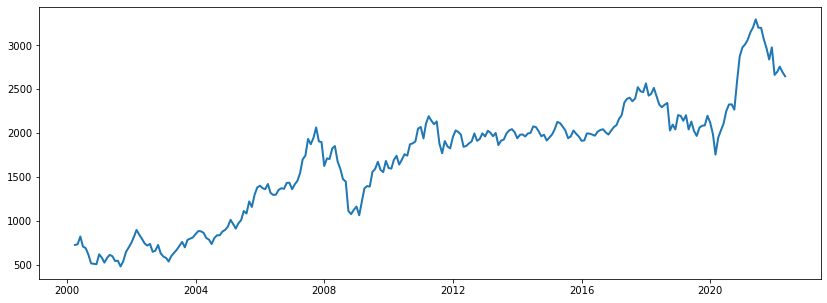

In [23]:
fig, axes = plt.subplots(figsize=(14,5))
plt.plot(df.index, df['종가'], label=df['종가'], linewidth=2)

In [24]:
df = df.dropna()
df

,CLI,종가
Date,,
2000-04-01,103.20330,725.39
2000-05-01,102.81550,731.88
2000-06-01,102.41150,821.22
2000-07-01,101.93900,705.97
2000-08-01,101.36300,688.62
...,...,...
2021-12-01,99.99874,2977.65
2022-01-01,99.75789,2663.34
2022-02-01,99.54153,2699.18


In [25]:
df.corr()

,CLI,종가
CLI,1.000000,0.164732
종가,0.164732,1.000000


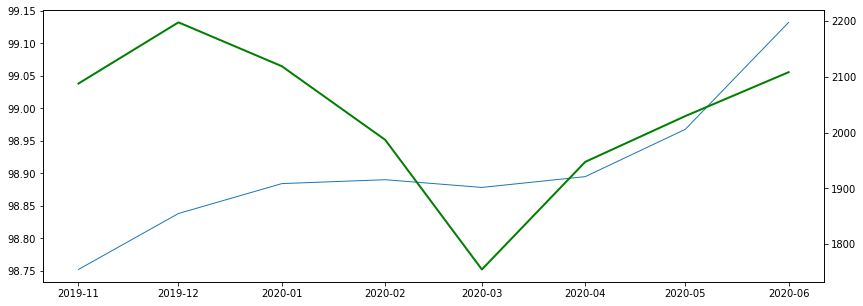

In [31]:
fig, ax1 = plt.subplots()
ax1.plot
ax1.plot(df.CLI.loc['2019-11-01':'2020-06-01'].index, df.CLI.loc['2019-11-01':'2020-06-01'], label=df.CLI.loc['2019-11-01':'2020-06-01'])
ax2 = ax1.twinx()
ax2.plot(df.종가.loc['2019-11-01':'2020-06-01'].index, df.종가.loc['2019-11-01':'2020-06-01'], color='green', linewidth=2)


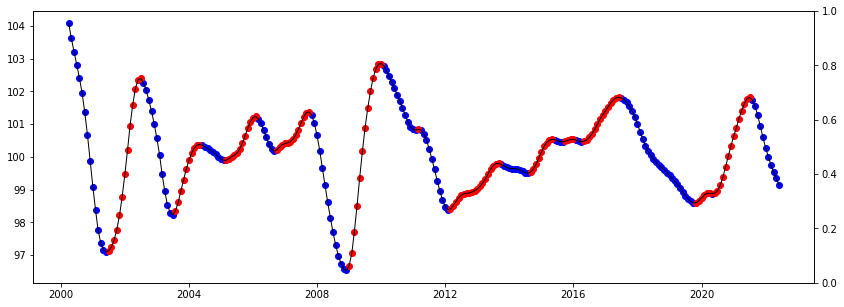

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot
# line plot
#ax1.plot(df.index, df['미국cli'], color='blue')
ax1.plot(df.index, df['CLI'], color='black')


ax1.scatter(df[둔감].index, df[둔감]['CLI'], color='blue')
ax1.scatter(df[확장].index, df[확장]['CLI'], color='red')
ax1.scatter(df[위축].index, df[위축]['CLI'], color='blue')
ax1.scatter(df[회복].index, df[회복]['CLI'], color='red')

#ax1.plot(df.index, df['종가'], color='green', linewidth=2)
ax2 = ax1.twinx()

#ax2.axhline(y=100, color='black', linewidth=1)
plt.show()


In [ ]:
clikor.to_excel('한국경기4국면.xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
short=pd.read_csv("/content/gdrive/My Drive/FINAL TEAM/파이널프로젝트/비주식팀/Data/채권지수.csv", encoding='cp949')

In [ ]:
short = short.sort_values('일자', ascending=True)

In [ ]:
short = short.set_index('일자')

In [ ]:
short

,총수익지수_종가,총수익지수_대비,순가격지수_종가,순가격지수_대비,제로재투자지수_종가,제로재투자지수_대비,콜재투자지수_종가,콜재투자지수_대비,시장가격지수_종가,시장가격지수_대비,듀레이션,컨벡시티,YTM
일자,,,,,,,,,,,,,
2006/03/02,99.89,NaN,99.88,NaN,99.89,NaN,99.89,NaN,101.82,NaN,2.375,11.030,4.894
2006/03/03,99.91,0.02,99.88,0.00,99.91,0.02,99.91,0.02,101.79,-0.03,2.381,11.054,4.908
2006/03/04,99.92,0.01,99.88,0.00,99.92,0.01,99.92,0.01,101.80,0.01,2.378,11.039,4.909
2006/03/05,99.94,0.02,99.88,0.00,99.94,0.02,99.94,0.02,101.81,0.01,2.376,11.025,4.910
2006/03/06,99.83,-0.11,99.76,-0.12,99.83,-0.11,99.83,-0.11,101.70,-0.11,2.370,10.978,4.947
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022/05/15,179.08,0.02,99.73,0.00,174.68,0.01,178.26,0.02,101.54,0.00,5.418,82.798,2.962
2022/05/16,178.71,-0.37,99.52,-0.21,174.37,-0.31,177.94,-0.32,101.33,-0.21,5.414,82.683,3.023
2022/05/17,178.70,-0.01,99.51,-0.01,174.36,-0.01,177.94,0.00,101.32,-0.01,5.413,82.700,3.027


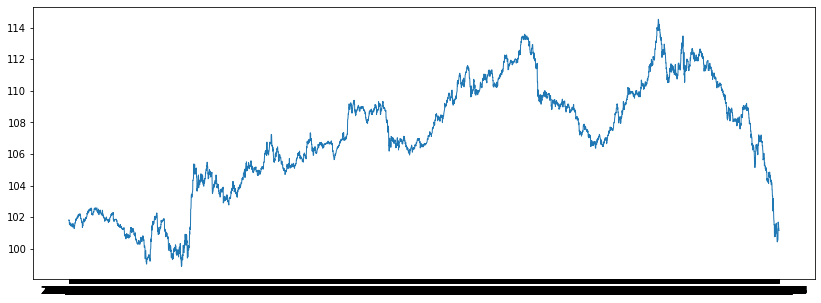

In [ ]:
fig, axes = plt.subplots(figsize=(14,5))
plt.plot(short['시장가격지수_종가'], label=short['시장가격지수_종가'])

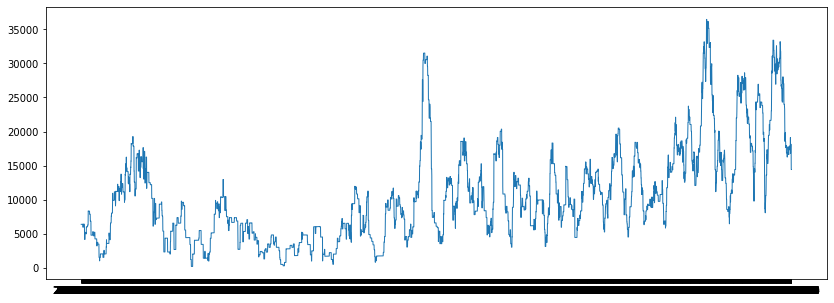

In [ ]:
fig, axes = plt.subplots(figsize=(14,5))
plt.plot(short.index, short['시가총액(억원)'], label=short['시가총액(억원)'])

In [ ]:
# 이 코드는 한국은행 경제통계시스템 (ECOS)의 자료를 다운 받습니다.

import datetime                     
import requests
import pandas as pd
from bs4 import BeautifulSoup


# ECOS 에서 데이터를 호출하는 함수를 만듭니다.

def EcosDownload(Statcode, Freq, Begdate, Enddate, Subcode1, Subcode2, Subcode3):
    
    url = 'http://ecos.bok.or.kr/api/StatisticSearch/HA5OFFNUUGG4TD13CMHV/xml/kr/1/100000/%s/%s/%s/%s/%s/%s/%s/'%(Statcode, Freq, Begdate, Enddate, Subcode1, Subcode2, Subcode3)

    raw = requests.get(url)
    xml = BeautifulSoup(raw.text,'xml')


    # Pandas 데이터프레임으로 전환합니다.

    raw_data = xml.find_all("row")

    date_list = []
    value_list = []

    for item in raw_data:
         
            value = item.find('DATA_VALUE').text.encode('utf-8')
            date_str = item.find('TIME').text
            
            value = float(value)
                
            date_list.append(datetime.datetime.strptime(date_str,'%Y%m'))
            value_list.append(value)
            
    df = pd.DataFrame(index = date_list)
    
    df['value'] = value_list
      
    return df


In [ ]:
df=EcosDownload('098Y001', 'MM', '199401', '202203', '0101000', '', '')
df.columns=['기준금리']
df

,기준금리
1999-05-01,4.75
1999-06-01,4.75
1999-07-01,4.75
1999-08-01,4.75
1999-09-01,4.75
...,...
2021-11-01,1.00
2021-12-01,1.00
2022-01-01,1.25
2022-02-01,1.25


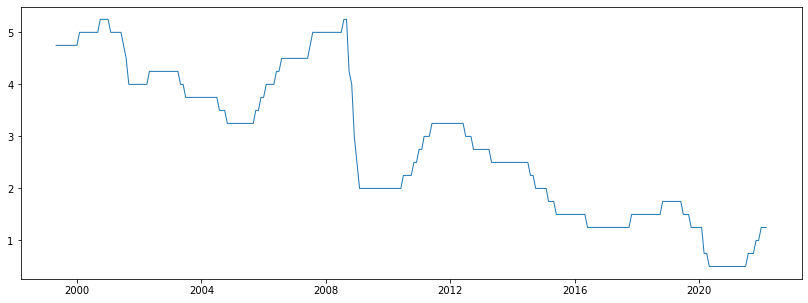

In [ ]:
fig, axes = plt.subplots(figsize=(14,5))
plt.plot(df.index, df['기준금리'], label=df['기준금리'])